# Numerical Simulations GBM Handbook

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Parameters:

In [2]:
# Parameters
S0 = 100          # Initial stock price
K = 100           # Strike price
T = 1             # Time to maturity in years
r = 0.05          # Risk-free interest rate
sigma = 0.2       # Volatility
B = 95            # Barrier level
N = 100           # Number of time steps
M = 1000          # Number of simulations

Simulate stock price paths:

In [3]:
# Function to simulate stock price paths
def simulate_stock_paths(S0, T, r, sigma, N, M):
    dt = T / N
    S = np.zeros((M, N + 1))
    S[:, 0] = S0
    for t in range(1, N + 1):
        z = np.random.standard_normal(M)
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return S

Black-Scholes Formula for comparison to MC simulation:

In [4]:
# Black-Scholes Formula for European Call Option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

## European Call Option

In [5]:
# Get simulate paths
simulated_paths = simulate_stock_paths(S0, T, r, sigma, N, M)

# Calculating payoff for each simulation at maturity
payoffs = np.maximum(simulated_paths[:, -1] - K, 0)
# Discounting the average payoff to present value
mc_valuation = np.exp(-r * T) * np.mean(payoffs)

# Black-Scholes Call Value
bs_call_value = black_scholes_call(S0, K, T, r, sigma)

print(f"European Call Option Price (MC): {mc_valuation:.6f}")
print(f"European Call Option Price (BS): {bs_call_value:.6f}")
print(f"|C_bs-C_mc|/|C_bs| = {np.abs(bs_call_value-mc_valuation)/np.abs(bs_call_value):.6f}")

European Call Option Price (MC): 10.062459
European Call Option Price (BS): 10.450584
|C_bs-C_mc|/|C_bs| = 0.037139


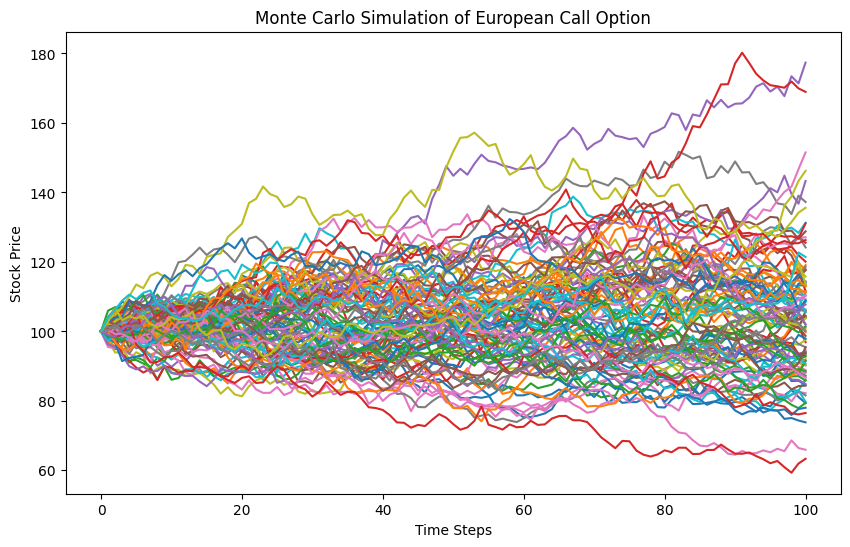

In [6]:
# Plotting a subset of the simulated paths
plt.figure(figsize=(10, 6))
plt.plot(simulated_paths[:100].T)
plt.title("Monte Carlo Simulation of European Call Option")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.show()

## Down-and-Out Barrier Option

Calculate the price for the down-and-out option. Notice that since there is a barrier there is an increased risk that the value of the option to be zero is higher compared to that of the European call. Thus, the time zero price of the down-and-out option should be less than of the European one.

In [7]:
# Simulate paths
stock_paths = simulate_stock_paths(S0, T, r, sigma, N, M)

# Calculate payoffs
payoffs = np.maximum(stock_paths[:, -1] - K, 0)  # Call option payoff at maturity
payoffs[stock_paths.min(axis=1) <= B] = 0  # Knock out if barrier is breached

# Calculate option price
option_price = np.exp(-r * T) * np.mean(payoffs)

print(f"Down-and-Out Call Option Price: {option_price:.2f}")

Down-and-Out Call Option Price: 6.69


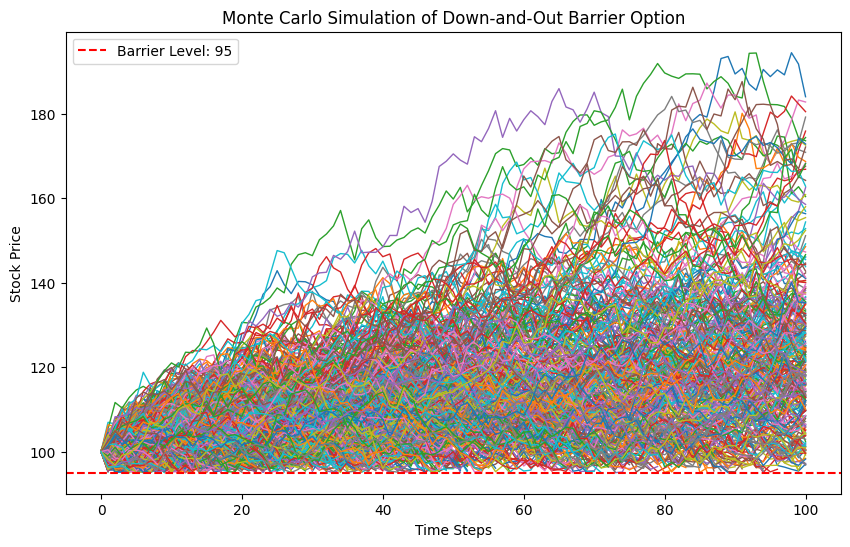

In [8]:
# Plot the paths and stop when hitting the barrier
plt.figure(figsize=(10, 6))

for path in stock_paths:
    stop_index = np.where(path <= B)[0]
    if stop_index.any():
        plt.plot(path[:stop_index[0]], lw=1)
    else:
        plt.plot(path, lw=1)

# Adding the barrier level to the plot
plt.axhline(y=B, color='r', linestyle='--', label=f'Barrier Level: {B}')
plt.title('Monte Carlo Simulation of Down-and-Out Barrier Option')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()